In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 활성화 함수(h(x))의 종류

### 계단 함수

In [3]:
def step_function(x):
  return np.array(x > 0, dtype="int")

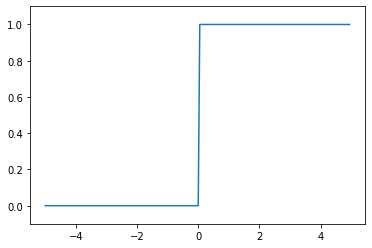

In [4]:
x = np.arange(-5., 5., 0.05)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid 함수

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

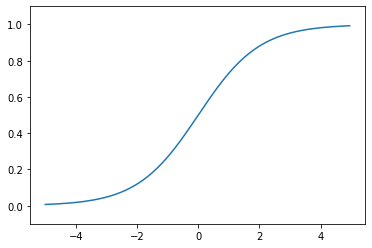

In [6]:
x = np.arange(-5.0, 5.0, 0.05)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU 함수

In [7]:
def ReLU(x):
  return np.maximum(x, 0)

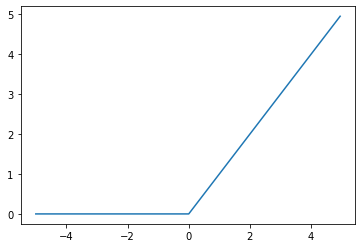

In [8]:
x = np.arange(-5., 5., 0.05)
y = ReLU(x)
plt.plot(x, y)
plt.show()

## 3층 신경망 구현 without 출력층

In [9]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2 ,0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

In [10]:
def identity_function(ret):
  return ret

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

In [11]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층

### Softmax function

In [12]:
def softmax(a):
  C = np.max(a)
  exps = np.exp(a - C)
  sum_exps = np.sum(exps)
  return exps / sum_exps

In [13]:
# Example of softmax
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## Practice : MNIST

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [23]:
X, y = mnist.data.values, mnist.target.values

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def img_show(img):
  plt.imshow(img)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./7.)

In [31]:
type(X_train)

numpy.ndarray

5


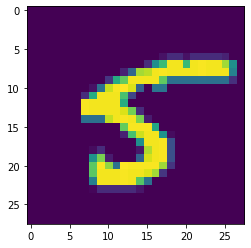

In [32]:
img = X_train[0]
label = y_train[0]

print(label)
img_show(img.reshape(28, 28))

In [36]:
import pickle

def get_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
  return X_test, y_test

def init_network():
  with open("/content/drive/MyDrive/ml-data/NN_chapter3/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

In [62]:
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

def softmax(x):
  c = np.max(x)
  exps = np.exp(x - c + 0.001)
  sum_of_exps = np.sum(exps)
  return exps / sum_of_exps

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  
  return y

In [63]:
X, y = mnist.data.values, mnist.target.values
X_test, y_test = get_data(X, y)
network = init_network()

accuracy_cnt = 0
for i in range(X_test.shape[0]):
  y = predict(network, X_test[i])
  p = np.argmax(y)
  if p == int(y_test[i]):
    accuracy_cnt += 1
print("Accuracy: "+str(accuracy_cnt * 1. / X_test.shape[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy: 0.9241428571428572


In [72]:
# BATCH

X, y = mnist.data.values, mnist.target.values
X_test, y_test = get_data(X, y)
network = init_network()

y_test = np.array(y_test, dtype=np.int)

batch_size = 100
accuracy_cnt = 0
for i in range(0, X_test.shape[0], batch_size):
  X_batch = X_test[i:i+batch_size]
  y_batch = predict(network, X_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == y_test[i:i+batch_size])

print("Accuracy: "+str(1. * accuracy_cnt / X_test.shape[0]))

Accuracy: 0.9234285714285714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
